### Implementing the algorithms from scratch

In [ ]:
# create the data 
import math
import random 

#parameters


#euclidian distance 
def cal_euclidian(point1, point2):
    assert len(point1)==len(point2), "lenght must be equal"
    return math.sqrt(sum([(point2[i] - point1[i])**2 for i in range(len(point1))]))

#calculate centers 
def cal_mean(points):
    sum_ = [0 for _ in range(len(points[0]))]
    for point in points:
        sum_ = [sum_[i] + point[i] for i in range(len(points[0]))]
    return [x/len(points) for x in sum_]

def k_means(data , k, iterations = 100):
    idx  = random.sample(range(len(data)), k)
    center = [data[i] for i in idx]
    for _ in range(iterations):
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [cal_euclidian(cen, point) for cen in center]
            clusters[distances.index(min(distances))].append(point)

        #update the centers 
        for i , cluster in  enumerate(clusters):
            center[i] = cal_mean(cluster)

    return center
        




## Visualising 

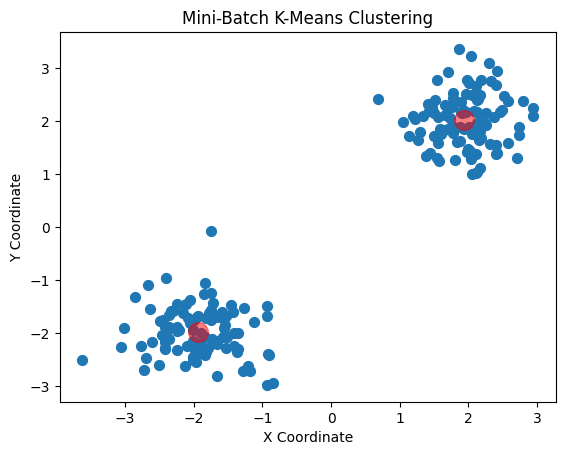

In [32]:
# Prepare the data
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
data = np.vstack([
    np.random.normal(loc=[2, 2], scale=0.5, size=(100, 2)),
    np.random.normal(loc=[-2, -2], scale=0.5, size=(100, 2))
])

# Apply the algorithm
centers = k_means(data, k=2)
centers = np.asarray(centers)
# Plot data and clusters
plt.scatter(data[:, 0], data[:, 1], s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Mini-Batch K-Means Clustering')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

In [25]:
k_means(data, k = 2)

[[[-2.6, 1.9, 2.0, 1.0],
  [-2.8, 1.7, -1.2, 1.5],
  [-1.5, -0.1, -1.6, -1.1],
  [-1.0, -0.6, -1.2, -0.7],
  [-0.3, 1.2, 2.6, 0.2],
  [-1.8, -1.3, -0.1, -1.2],
  [0.2, 1.2, -0.6, -1.3],
  [-5.2, 0.3, 0.2, 2.2],
  [-0.8, -0.1, 1.5, -0.1],
  [-2.3, 0.3, 0.8, 0.7],
  [0.2, 3.0, 3.6, -0.9]],
 [[2.0, -0.9, 0.3, 2.3], [1.7, -0.8, -0.0, 2.0], [2.8, 0.8, 1.8, -0.7]]]